In [1]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
# get the dataset SILAKAN DIGANTI DENGAN final_dataset
def get_dataset():
	X, y = make_multilabel_classification(n_samples=1000, n_features=26, n_classes=7, n_labels=2, random_state=1)
	return X, y

# get the model
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(26, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [3]:
# evaluate a model using repeated k-fold cross-validation
# define model
X,y=get_dataset()
model = get_model(n_inputs=26, n_outputs=7)
from sklearn.model_selection import train_test_split

# fit model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) 
model.fit(X_train, y_train,verbose=1,epochs=10)

# make a prediction on the test set
yhat = model.predict(X_test)
yprob=yhat #UNTUK ROC AUC KRITING
# round probabilities to class labels
yhat = yhat.round() #UNTUK EVAL METRIK
#print(yprob[1,])
#print(yhat[1,])

Epoch 1/10
21/21 [==============================] - 0s 746us/step - loss: 1.1733
Epoch 2/10
21/21 [==============================] - 0s 597us/step - loss: 0.8280
Epoch 3/10
21/21 [==============================] - 0s 630us/step - loss: 0.6585
Epoch 4/10
21/21 [==============================] - 0s 609us/step - loss: 0.5805
Epoch 5/10
21/21 [==============================] - 0s 583us/step - loss: 0.5393
Epoch 6/10
21/21 [==============================] - 0s 612us/step - loss: 0.5121
Epoch 7/10
21/21 [==============================] - 0s 598us/step - loss: 0.4912
Epoch 8/10
21/21 [==============================] - 0s 593us/step - loss: 0.4738
Epoch 9/10
21/21 [==============================] - 0s 586us/step - loss: 0.4582
Epoch 10/10
11/11 [==============================] - 0s 444us/step


In [4]:
#hitung CM untuk eval metrik yang lain pre memori
from sklearn.metrics import multilabel_confusion_matrix
multilabel_confusion_matrix(y_test, yhat)
from sklearn.metrics import classification_report
label_names = ['label A', 'label B', 'label C', 'label D','label E', 'label F', 'label G']
print(classification_report(y_test, yhat,target_names=label_names))

              precision    recall  f1-score   support

     label A       0.55      0.50      0.52       127
     label B       0.80      0.81      0.81       180
     label C       0.00      0.00      0.00         1
     label D       0.47      0.40      0.43       117
     label E       0.38      0.32      0.34        66
     label F       0.56      0.12      0.19        43
     label G       0.67      0.48      0.56        89

   micro avg       0.62      0.52      0.57       623
   macro avg       0.49      0.38      0.41       623
weighted avg       0.61      0.52      0.55       623
 samples avg       0.57      0.52      0.50       623



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn

In [5]:
# membuat AUC ROC label A
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(y_test[:,1], yprob[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.8454444444444444


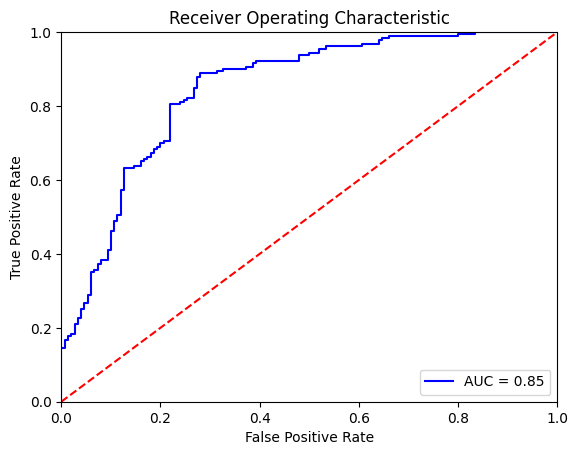

In [6]:
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

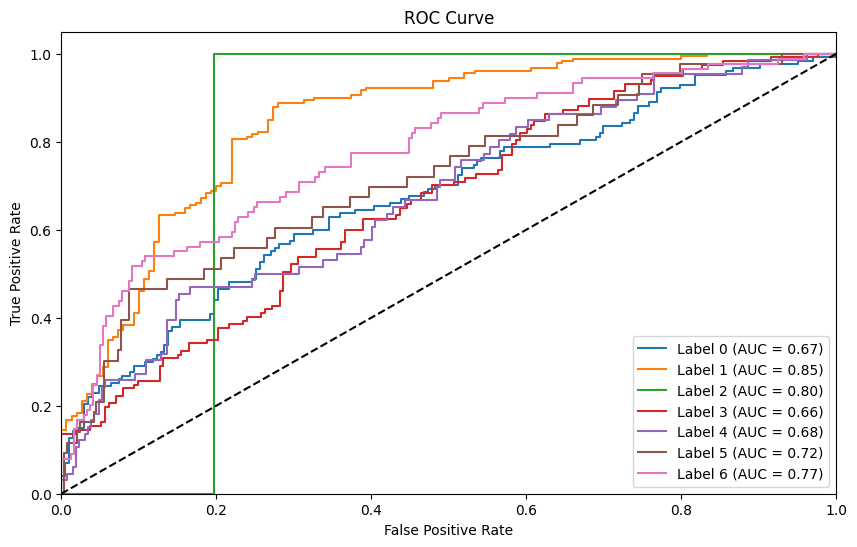

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
roc_auc_per_label = dict()
#predictions=preds
for i in range(y.shape[1]):
    fpr, tpr, _ = metrics.roc_curve(y_test[:,i], yprob[:,i])
    roc_auc_per_label[i] = metrics.roc_auc_score(y_test[:,i], yprob[:,i])
    plt.plot(fpr, tpr, label='Label %d (AUC = %0.2f)' % (i, roc_auc_per_label[i]))
# Plot ROC curve for each label
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

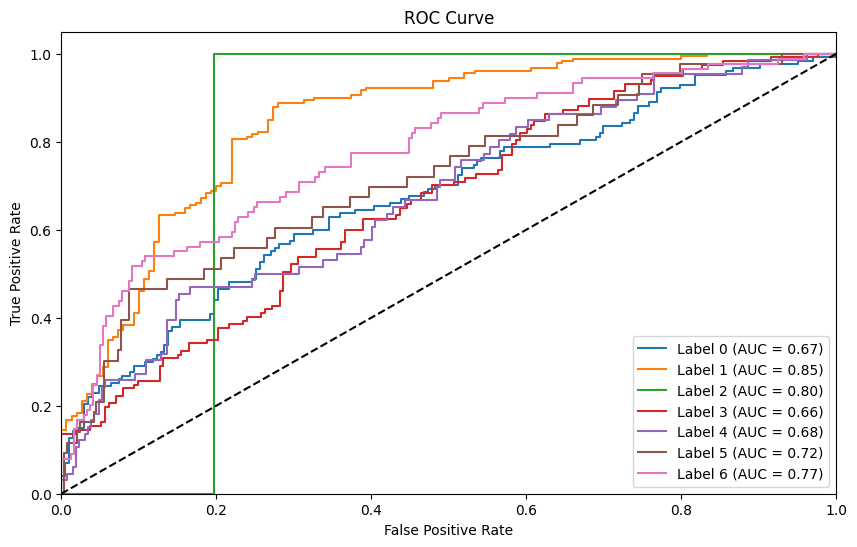

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
roc_auc_per_label = dict()

for i in range(y.shape[1]):
    fpr, tpr, _ = metrics.roc_curve(y_test[:, i], yprob[:, i])
    roc_auc_per_label[i] = metrics.roc_auc_score(y_test[:, i], yprob[:, i])
    plt.plot(fpr, tpr, label='Label %d (AUC = %0.2f)' % (i, roc_auc_per_label[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
